In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('detailed_ev_charging_stations.csv')

In [49]:
df.head()

,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


In [38]:
df.describe()

,Latitude,Longitude,Cost (USD/kWh),Distance to City (km),Usage Stats (avg users/day),Charging Capacity (kW),Installation Year,Reviews (Rating),Parking Spots
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,19.942607,8.833487,0.300196,10.201810,55.453800,144.272000,2016.569400,3.994800,5.519600
std,32.315818,93.724046,0.115733,5.608316,26.494986,128.370674,4.004746,0.582667,2.874103
min,-89.680850,-178.870028,0.100000,0.500000,10.000000,22.000000,2010.000000,3.000000,1.000000
25%,13.758953,-87.680319,0.200000,5.430000,32.000000,50.000000,2013.000000,3.500000,3.000000
50%,34.029053,18.495233,0.300000,10.190000,56.000000,150.000000,2017.000000,4.000000,5.000000
75%,41.840249,100.454629,0.400000,14.902500,79.000000,350.000000,2020.000000,4.500000,8.000000
max,89.464534,179.664661,0.500000,20.000000,100.000000,350.000000,2023.000000,5.000000,10.000000


In [6]:
df.drop('Station ID', inplace=True, axis =1)

In [7]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Address,0
Charger Type,0
Cost (USD/kWh),0
Availability,0
Distance to City (km),0
Usage Stats (avg users/day),0
Station Operator,0
Charging Capacity (kW),0


In [8]:
df.shape

(5000, 16)

In [9]:
df.columns

Index(['Latitude', 'Longitude', 'Address', 'Charger Type', 'Cost (USD/kWh)',
       'Availability', 'Distance to City (km)', 'Usage Stats (avg users/day)',
       'Station Operator', 'Charging Capacity (kW)', 'Connector Types',
       'Installation Year', 'Renewable Energy Source', 'Reviews (Rating)',
       'Parking Spots', 'Maintenance Frequency'],
      dtype='object')

In [10]:
df['Usage Stats (avg users/day)'].value_counts()

,count
Usage Stats (avg users/day),
18,72
75,71
89,71
90,70
96,69
...,...
58,46
46,44
91,44


In [11]:
df['Usage Stats (avg users/day)'].mean()

55.4538

In [12]:
most_location = df.groupby('Address')['Usage Stats (avg users/day)'].mean().nlargest(10)

In [13]:
print(most_location)

Address
1029 Seoul Ave, Seoul                100.0
1200 Beijing Ave, Beijing            100.0
1259 Cape Town Ave, Cape Town        100.0
1534 Chicago Ave, Chicago            100.0
2220 Random Rd, City 308, Country    100.0
2340 Seoul Ave, Seoul                100.0
2418 Dubai Ave, Dubai                100.0
2647 Berlin Ave, Berlin              100.0
271 Dubai Ave, Dubai                 100.0
2939 Berlin Ave, Berlin              100.0
Name: Usage Stats (avg users/day), dtype: float64


In [14]:
least_location = df.groupby('Address')['Usage Stats (avg users/day)'].mean().nsmallest(10)

In [15]:
print(least_location)

Address
1044 Mexico City Ave, Mexico City    10.0
1412 Moscow Ave, Moscow              10.0
2076 Mumbai Ave, Mumbai              10.0
2167 Chicago Ave, Chicago            10.0
2613 Random Rd, City 467, Country    10.0
2808 Beijing Ave, Beijing            10.0
3032 Bangkok Ave, Bangkok            10.0
3100 Seoul Ave, Seoul                10.0
3554 Dubai Ave, Dubai                10.0
3589 Mumbai Ave, Mumbai              10.0
Name: Usage Stats (avg users/day), dtype: float64


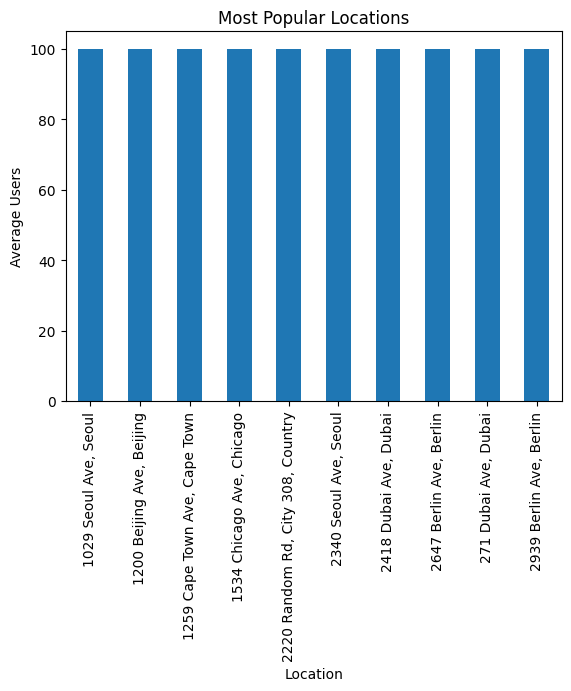

In [16]:
most_location.plot(kind = 'bar')
plt.xlabel('Location')
plt.ylabel('Average Users')
plt.title('Most Popular Locations')
plt.show()

In [17]:
df['Station Operator'].value_counts()

,count
Station Operator,
Tesla,1029
ChargePoint,1004
EVgo,1002
Greenlots,987
Ionity,978


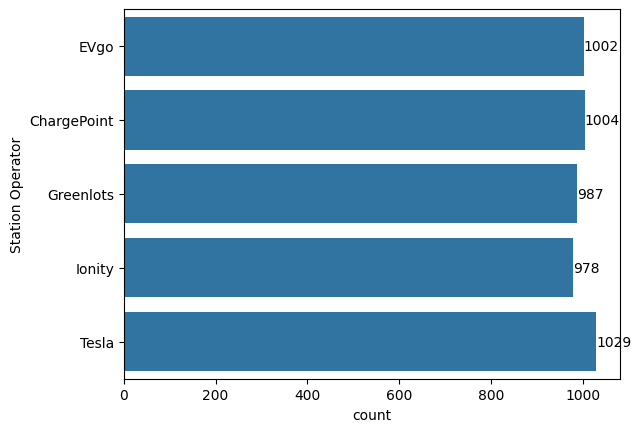

In [18]:
ax = sns.countplot(df['Station Operator'])
#plt.figure(figsize = (40,10))

for i in ax.containers:
    ax.bar_label(i,)

In [19]:
parking = df.groupby('Address')['Parking Spots'].value_counts().nlargest(10)

In [20]:
print(parking)

Address                            Parking Spots
2317 Mexico City Ave, Mexico City  1                2
4042 Chicago Ave, Chicago          10               2
6363 Sydney Ave, Sydney            2                2
7714 Berlin Ave, Berlin            9                2
7797 Mumbai Ave, Mumbai            6                2
10 Sydney Ave, Sydney              1                1
100 Mexico City Ave, Mexico City   3                1
1000 Cape Town Ave, Cape Town      2                1
1004 Toronto Ave, Toronto          3                1
1005 Random Rd, City 281, Country  10               1
Name: count, dtype: int64


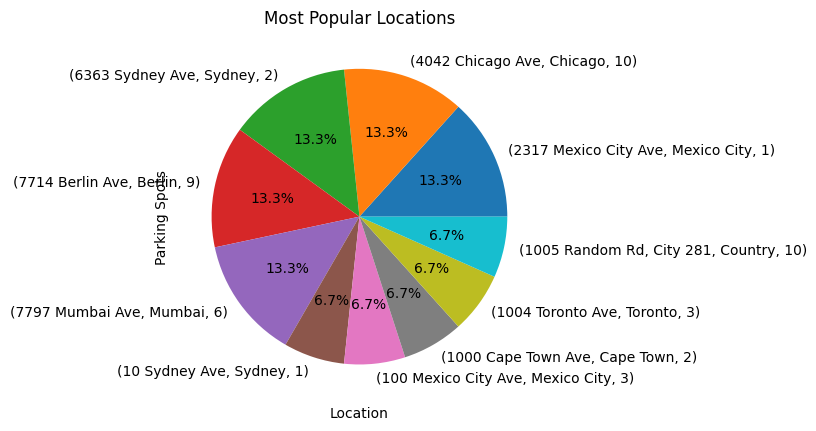

In [21]:
parking.plot(kind = 'pie' ,autopct = '%1.1f%%')
plt.xlabel('Location')
plt.ylabel('Parking Spots')
plt.title('Most Popular Locations')
plt.show()

In [22]:
df['Reviews (Rating)'].mean()

3.9948

In [23]:
station_ratings = df.groupby('Reviews (Rating)')['Station Operator'].value_counts().nlargest(10)

In [24]:
print(station_ratings)

Reviews (Rating)  Station Operator
4.9               Greenlots           68
4.3               Ionity              65
3.3               Ionity              64
4.6               Tesla               64
3.6               ChargePoint         63
3.3               ChargePoint         61
3.4               ChargePoint         61
4.0               Greenlots           61
4.1               EVgo                61
3.4               Ionity              60
Name: count, dtype: int64


TOP STATIONS WITH HIGHEST RATINGS

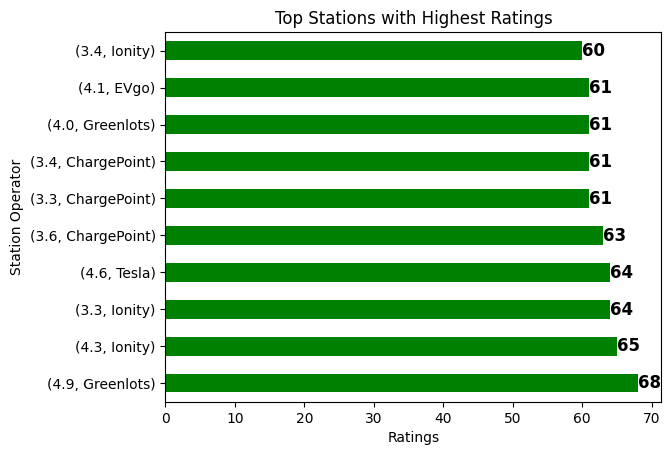

In [25]:
ax= station_ratings.plot(kind = 'barh' , color = 'green')

plt.xlabel('Ratings')
plt.ylabel('Station Operator')
plt.title('Top Stations with Highest Ratings')

for p in ax.patches:
     ax.annotate(f'{p.get_width():.0f}',  # Value of the bar
                (p.get_width(), p.get_y() + p.get_height() / 2),  # Positioning the text
                ha='left', va='center', fontsize=12, fontweight='bold')

plt.show()

In [26]:
df.columns

Index(['Latitude', 'Longitude', 'Address', 'Charger Type', 'Cost (USD/kWh)',
       'Availability', 'Distance to City (km)', 'Usage Stats (avg users/day)',
       'Station Operator', 'Charging Capacity (kW)', 'Connector Types',
       'Installation Year', 'Renewable Energy Source', 'Reviews (Rating)',
       'Parking Spots', 'Maintenance Frequency'],
      dtype='object')

In [27]:
df['Charger Type'].value_counts()

,count
Charger Type,
AC Level 2,1764
AC Level 1,1638
DC Fast Charger,1598


In [28]:
operator_withchargertype = df.groupby('Station Operator')['Charger Type'].value_counts()
print(operator_withchargertype)

Station Operator  Charger Type   
ChargePoint       AC Level 2         343
                  DC Fast Charger    337
                  AC Level 1         324
EVgo              AC Level 2         339
                  DC Fast Charger    335
                  AC Level 1         328
Greenlots         AC Level 2         369
                  AC Level 1         320
                  DC Fast Charger    298
Ionity            AC Level 2         338
                  DC Fast Charger    323
                  AC Level 1         317
Tesla             AC Level 2         375
                  AC Level 1         349
                  DC Fast Charger    305
Name: count, dtype: int64


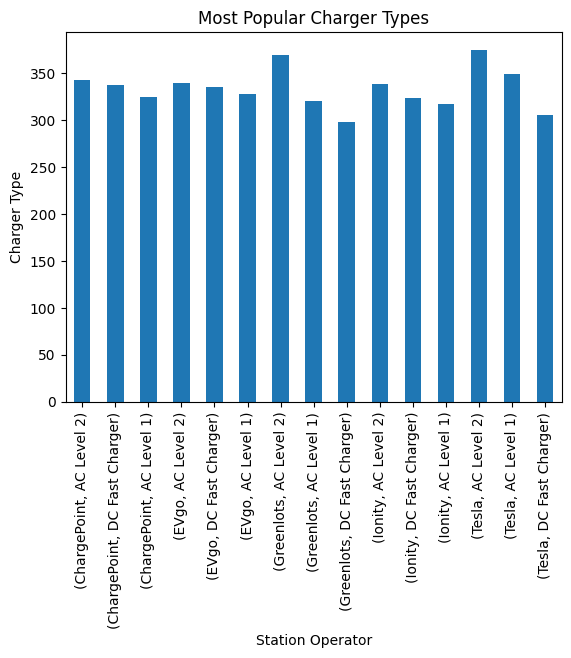

In [29]:
operator_withchargertype.plot(kind = 'bar')
plt.xlabel('Station Operator')
plt.ylabel('Charger Type')
plt.title('Most Popular Charger Types')
plt.show()

In [30]:
operator_withchargertype = df.groupby('Station Operator')['Charger Type'].value_counts().nlargest(10)
print(operator_withchargertype)

Station Operator  Charger Type   
Tesla             AC Level 2         375
Greenlots         AC Level 2         369
Tesla             AC Level 1         349
ChargePoint       AC Level 2         343
EVgo              AC Level 2         339
Ionity            AC Level 2         338
ChargePoint       DC Fast Charger    337
EVgo              DC Fast Charger    335
                  AC Level 1         328
ChargePoint       AC Level 1         324
Name: count, dtype: int64


THE STATION THAT HAS MOST OF HIGHESH LEVEL CHARGER TYPE

In [31]:
Availability = df.groupby('Station Operator')['Availability'].value_counts()
print(Availability)

Station Operator  Availability
ChargePoint       6:00-22:00      344
                  9:00-18:00      344
                  24/7            316
EVgo              6:00-22:00      344
                  24/7            330
                  9:00-18:00      328
Greenlots         24/7            375
                  6:00-22:00      310
                  9:00-18:00      302
Ionity            6:00-22:00      331
                  9:00-18:00      328
                  24/7            319
Tesla             6:00-22:00      344
                  9:00-18:00      344
                  24/7            341
Name: count, dtype: int64


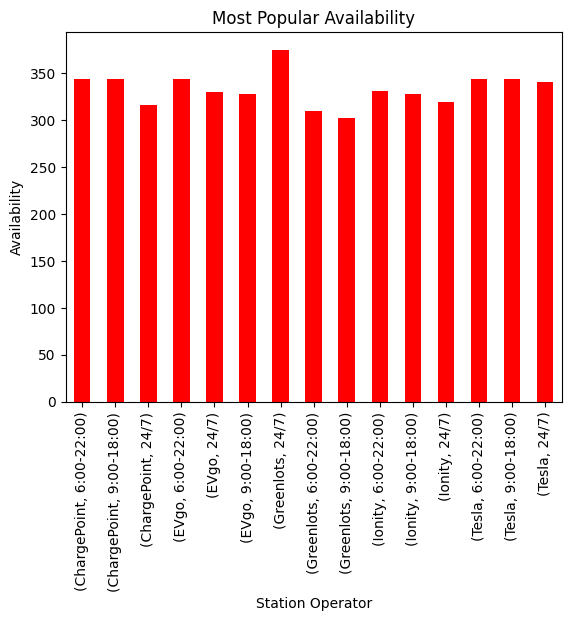

In [35]:
Availability.plot(kind = 'bar' , color = 'red')
plt.xlabel('Station Operator')
plt.ylabel('Availability')
plt.title('Most Popular Availability')
plt.show()

In [36]:
df.columns

Index(['Latitude', 'Longitude', 'Address', 'Charger Type', 'Cost (USD/kWh)',
       'Availability', 'Distance to City (km)', 'Usage Stats (avg users/day)',
       'Station Operator', 'Charging Capacity (kW)', 'Connector Types',
       'Installation Year', 'Renewable Energy Source', 'Reviews (Rating)',
       'Parking Spots', 'Maintenance Frequency'],
      dtype='object')

In [48]:
cost = df.groupby('Station Operator')['Cost (USD/kWh)'].value_counts().nlargest(10)
print(cost)

Station Operator  Cost (USD/kWh)
Tesla             0.13              38
Greenlots         0.24              37
ChargePoint       0.13              36
EVgo              0.37              36
Greenlots         0.33              36
Ionity            0.23              36
Tesla             0.41              36
ChargePoint       0.41              35
                  0.42              35
Tesla             0.34              35
Name: count, dtype: int64


In [41]:
Maintainenace = df.groupby('Station Operator')['Maintenance Frequency'].value_counts()
print(Maintainenace)

Station Operator  Maintenance Frequency
ChargePoint       Annually                 339
                  Monthly                  334
                  Quarterly                331
EVgo              Monthly                  342
                  Annually                 332
                  Quarterly                328
Greenlots         Monthly                  334
                  Quarterly                327
                  Annually                 326
Ionity            Quarterly                352
                  Monthly                  314
                  Annually                 312
Tesla             Monthly                  354
                  Quarterly                341
                  Annually                 334
Name: count, dtype: int64


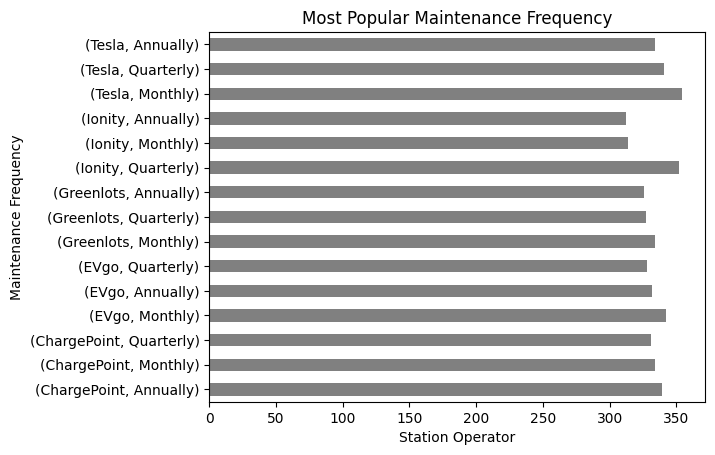

In [44]:
Maintainenace.plot(kind = 'barh', color = 'grey')
plt.xlabel('Station Operator')
plt.ylabel('Maintenance Frequency')
plt.title('Most Popular Maintenance Frequency')
plt.show()

In [51]:
df['Connector Types'].value_counts().nlargest(10)

,count
Connector Types,
CCS,680
Type 2,639
CHAdeMO,624
Tesla,610
"Type 2, Tesla",227
"Type 2, CCS",223
"Type 2, CHAdeMO",222
"Tesla, CCS",218
"CCS, Tesla",204
